# Extract MILC output
- Dec 28, 2021

## Description of columns in parse script : 



- Solve time =  2 x sum of all mass-solve times


- quda-total-time = solve-time + mg-setup + epsilon

- summed_time = quda_total_time + contractions + epsilon

- milc_total_time = summed_time + err

In [1]:
import os, glob
import subprocess as sp
import numpy as np
import shutil

import re

import pandas as pd

import matplotlib.pyplot as plt
from ipywidgets import *

import itertools

In [2]:
%matplotlib widget

In [16]:
# fname='/gpfs/alpine/lgt104/proj-shared/ayyar/builds_lqcd/run_mgrid/output-tune-2.kpp'

fname='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/runs_march14_2022/output-full-xfast-1536vec-run-1.kpp'
fname2='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/runs_march14_2022/output-full-drop-xfast-1536vec-run-1.kpp'
fname3='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/parse_timings/output-cg.kpp'
# fname4='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_crusher/runs_june14_2022/output-full.kpp'
# fname4='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_crusher/runs_august2_2022/test_run/output-full.kpp'
fname4='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_crusher/runs_sept29_2022/output-full_prec-single.kpp'
fname5='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_crusher/runs_oct28_2022/run1_2228/output-full.kpp'
fname6='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_crusher/runs_oct28_2022/run2_6222/output-full.kpp'

In [17]:
%%bash -s "$fname"
./parse.sh $1 mg > op.out

In [18]:
%%bash -s "$fname2"
./parse.sh $1 mg > op2.out

In [19]:
%%bash -s "$fname3"
./parse.sh $1 cg > op3.out

In [20]:
%%bash -s "$fname4"
./parse.sh $1 mg > op4.out

In [21]:
%%bash -s "$fname5"
./parse.sh $1 mg > op5.out

In [22]:
%%bash -s "$fname6"
./parse.sh $1 mg > op6.out

In [8]:
# ! ./parse.sh /gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/runs_march14_2022/output-full-xfast-1536vec-run-1.kpp mg > op.out


In [9]:
# cmd='./parse.sh {0} mg'.format(fname)
# print(cmd)
# op=sp.check_output(cmd,shell=True)

In [24]:
df_data=pd.DataFrame([])

op_files=['op.out','op2.out','op3.out','op4.out','op5.out','op6.out']
# names=['full','drop','cg']
names=['full_hisq','naive_stag','cg','crusher1','crusher2','crusher3']
nodes=[144,144,72,144,144,144]

for op_file, name,node in zip(op_files,names,nodes):
    print(op_file,name)
    with open(op_file,'r') as f:
        lst=f.readlines()

    print(lst)
    dict_values={}
    dict_values['name']=name
    dict_values['nodes']=int(node)
    # Add masses
    keys=lst[0].rstrip('\n').split(' ')
    vals=lst[1].rstrip('\n').split(' ')

    # Add timings
    keys+=lst[2].rstrip('\n').split(' ')
    vals+=lst[3].rstrip('\n').split(' ')

    # Add values to dictionary
    for k,v in zip(keys,vals):
        dict_values[k]=np.float64(v)

    df_data=df_data.append(dict_values,ignore_index=True)

op.out full_hisq
['mass-01 mass-02 mass-03 mass-04-10 mass-11-20\n', '2.3328819000000003e+01 2.0972033499999998e+01 2.2804720499999998e+01 1.6968526500000002e+02 9.2148931500000003e+01\n', 'startup loading mg-setup solve-time make/save-src contractions summed-time quda-total-time milc-total-time error\n', '6.889721e+01 1.836686e+02 1573.23 6.5787953900000002e+02 8.203077e+01 1.912514e+02 2.7569575190000000e+03 2283.090 2.813158e+03 5.620048099999985e+01\n']
op2.out naive_stag
['mass-01 mass-02 mass-03 mass-04-10 mass-11-20\n', '2.6410875600000004e+01 2.2684568500000001e+01 2.2347331499999999e+01 1.7282348500000001e+02 9.5581005849999983e+01\n', 'startup loading mg-setup solve-time make/save-src contractions summed-time quda-total-time milc-total-time error\n', '6.878589e+01 2.198139e+02 1321.48 6.7969453290000001e+02 8.024901e+01 1.859288e+02 2.5559521328999999e+03 2021.795 2.580789e+03 2.483686710000029e+01\n']
op3.out cg
['mass-01-10 mass-11-20\n', '1.3709695999999999e+03 1.652717629

/tmp/ipykernel_84/2136875848.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data=df_data.append(dict_values,ignore_index=True)
/tmp/ipykernel_84/2136875848.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data=df_data.append(dict_values,ignore_index=True)
/tmp/ipykernel_84/2136875848.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data=df_data.append(dict_values,ignore_index=True)
/tmp/ipykernel_84/2136875848.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data=df_data.append(dict_values,ignore_index=True)
/tmp/ipykernel_84/2136875848.py:29: FutureWarning: The frame.append method is deprecated and will be

In [25]:
df_data.columns

Index(['name', 'nodes', 'mass-01', 'mass-02', 'mass-03', 'mass-04-10',
       'mass-11-20', 'startup', 'loading', 'mg-setup', 'solve-time',
       'make/save-src', 'contractions', 'summed-time', 'quda-total-time',
       'milc-total-time', 'error', 'mass-01-10'],
      dtype='object')

In [26]:
cols=['name', 'nodes', 'mass-01', 'mass-02', 'mass-03', 'mass-04-10',
       'mass-11-20', 'mass-01-10', 'startup', 'loading', 'mg-setup', 'solve-time',
       'make/save-src', 'contractions', 'summed-time', 'quda-total-time',
       'milc-total-time', 'error']
df=df_data[cols].copy()
nmax=max(df.nodes.values)
df['node_factor']=df.apply(lambda row: row.nodes/nmax, axis=1)

times_lst=['mass-01','mass-01-10', 'mass-02', 'mass-03', 'mass-04-10',
       'mass-11-20', 'startup', 'loading', 'mg-setup', 'solve-time',
       'make/save-src', 'contractions', 'summed-time', 'quda-total-time',
       'milc-total-time', 'error']

for col in times_lst:
    df[col]=df[col]*df['node_factor']
    
df

,name,nodes,mass-01,mass-02,mass-03,mass-04-10,mass-11-20,mass-01-10,startup,loading,mg-setup,solve-time,make/save-src,contractions,summed-time,quda-total-time,milc-total-time,error,node_factor
0,full_hisq,144,23.328819,20.972033,22.804720,169.685265,92.148932,NaN,68.897210,183.6686,1573.23,657.879539,82.030770,191.25140,2756.957519,2283.090,2813.1580,56.200481,1.0
1,naive_stag,144,26.410876,22.684569,22.347331,172.823485,95.581006,NaN,68.785890,219.8139,1321.48,679.694533,80.249010,185.92880,2555.952133,2021.795,2580.7890,24.836867,1.0
2,cg,72,NaN,NaN,NaN,NaN,82.635881,685.4848,35.863895,309.8931,0.00,1536.241363,29.525395,208.42975,2119.953503,1637.801,2131.5765,11.622997,0.5
3,crusher1,144,22.947437,17.204553,18.253410,106.273830,54.441717,NaN,49.054180,295.2642,1666.56,438.241892,48.958840,331.64960,2829.728712,2118.739,2851.6210,21.892288,1.0
4,crusher2,144,24.062425,19.521604,19.702720,106.996000,54.980412,NaN,50.563820,291.2498,1747.61,450.526321,44.776190,331.97560,2916.701731,2212.125,2940.3140,23.612269,1.0
5,crusher3,144,24.131117,20.409475,19.869829,108.183160,55.475276,NaN,36.016260,276.8052,1649.71,456.137714,49.803680,345.48380,2813.956654,2120.104,2838.2800,24.323346,1.0


In [27]:
sub_list=['name','mg-setup','solve-time','milc-total-time']
df[sub_list]

,name,mg-setup,solve-time,milc-total-time
0,full_hisq,1573.23,657.879539,2813.1580
1,naive_stag,1321.48,679.694533,2580.7890
2,cg,0.00,1536.241363,2131.5765
3,crusher1,1666.56,438.241892,2851.6210
4,crusher2,1747.61,450.526321,2940.3140
5,crusher3,1649.71,456.137714,2838.2800


,name,summed-time
0,full_hisq,2756.957519
1,naive_stag,2555.952133
2,cg,2119.953503
3,crusher1,2829.728712
4,crusher2,2916.701731
5,crusher3,2813.956654


['full_hisq' 'naive_stag' 'cg' 'crusher1' 'crusher2' 'crusher3'] [2756.957519  2555.9521329 2119.953503  2829.7287121 2916.7017313
 2813.9566538]


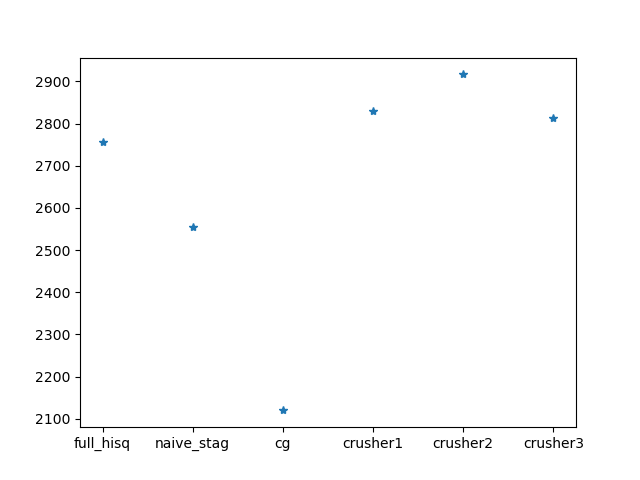

In [28]:
y_options=['mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-11-20',
       'startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error', 'mass-01-10']


def f_compare_plot(df,y,x='name'):
    # df.plot(x=x,y=y,kind='line',marker='D')
    
    display(df[[x,y]])
    
    x=df.name.values
    y=df[y].values
    print(x,y)
    plt.figure()
    plt.plot(x,y,marker='*',linestyle='')
    # plt.plot(y,marker='*')
    # plt.legend()
    plt.show()
    
# df.plot(x='name',y='summed-time',kind='line',marker='*')
f_compare_plot(df,'summed-time','name')

In [29]:
interact(f_compare_plot,df=fixed(df),y=y_options,x=fixed('name'))

interactive(children=(Dropdown(description='y', options=('mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-…

<function __main__.f_compare_plot(df, y, x='name')>

In [30]:
df[df.name=='cg']

,name,nodes,mass-01,mass-02,mass-03,mass-04-10,mass-11-20,mass-01-10,startup,loading,mg-setup,solve-time,make/save-src,contractions,summed-time,quda-total-time,milc-total-time,error,node_factor
2,cg,72,NaN,NaN,NaN,NaN,82.635881,685.4848,35.863895,309.8931,0.0,1536.241363,29.525395,208.42975,2119.953503,1637.801,2131.5765,11.622997,0.5


In [31]:
def f_plot_together(df,labels_lst,markers_lst): 
    plt.figure()
    x=df.name.values

    for label,marker in zip(labels_lst,markers_lst):
        y=df[label].values
        plt.plot(x,y,marker=marker,label=label)

    plt.legend()

    

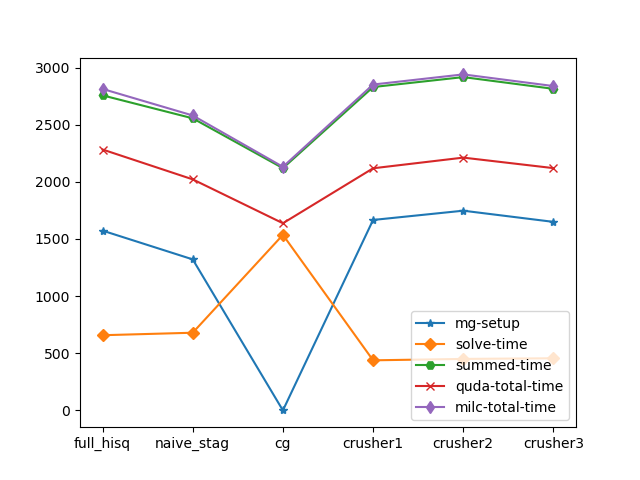

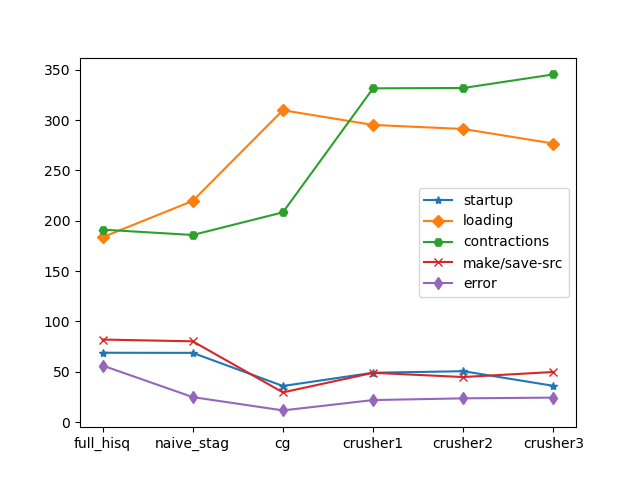

In [32]:
markers=['*','D','H','x','d','p','1','2','h','v']
labels=['startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error']

labels1=['mg-setup', 'solve-time','summed-time', 'quda-total-time', 'milc-total-time']

labels2=['startup', 'loading','contractions','make/save-src','error']

f_plot_together(df,labels1,markers)
f_plot_together(df,labels2,markers)
